In [1]:
import os
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
from tesser import util
import pandas as pd
from tesser import sr
from tesser import tasks
from tesser import util
from tesser import rsa
from tesser import fit
import importlib
from scipy.spatial import distance
from scipy import stats
import seaborn as sns
#! pip list

## Load data for all subjects

In [2]:
#Work path
#data_dir = '/Users/athula/Dropbox/Experiments/tesser_successor/Data'

#Laptop path
data_dir = '/Users/athulapudhiyidath/Dropbox/Experiments/tesser_successor/Data'

struct = util.load_struct(data_dir)
induct = util.load_induct(data_dir)
all_induct_bias = tasks.induct_bias_all(data_dir)
all_induct_bias

,participant,overall,prim,bound1,bound2
0,100,-0.238095,-0.333333,-0.333333,0.333333
1,101,0.095238,0.066667,0.333333,0.000000
2,102,0.666667,0.733333,0.666667,0.333333
3,103,0.190476,0.200000,0.000000,0.333333
4,104,0.000000,0.000000,-0.333333,0.333333
5,105,0.476190,0.333333,0.666667,1.000000
6,106,0.428571,0.466667,-0.333333,1.000000
7,107,0.142857,0.066667,-0.333333,1.000000
8,108,0.095238,0.133333,-0.333333,0.333333
9,109,0.571429,0.666667,0.666667,0.000000


## Fit each individual subject

In [3]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau'] 
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 1]}
results = fit.fit_induct_indiv(struct, induct, fixed, var_names, var_bounds)

Estimating parameters for 100...


/Users/athula/Dropbox/Experiments/tesser_successor/tesser_successor/tesser/fit.py:40: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((SR[cue, opt[response]] ** tau) /
/Users/athula/Dropbox/Experiments/tesser_successor/tesser_successor/tesser/fit.py:41: RuntimeWarning: invalid value encountered in double_scalars
  (SR[cue, opt[0]] ** tau + SR[cue, opt[1]] ** tau))


Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 107...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating

In [4]:
results
#results.to_csv('individual_induct_StructSRmodel_mean_fits_alpha_free_gamma_free_gamma_tau_30.csv', index=False)
results.to_csv('individual_induct_StructSRmodel_mean_fits_alpha_free_gamma_free_gamma_free_tau.csv', index=False)

In [5]:
results

,gamma,alpha,tau,subject,log_like
0,1.000000,0.999292,0.134592,100,-28.476252
1,1.000000,0.725062,1.000000,101,-26.553214
2,0.776365,0.022944,0.725353,102,-20.825487
3,0.908970,0.702115,1.000000,103,-25.945627
4,0.000873,0.615752,0.026671,104,-28.753845
5,1.000000,0.074591,1.000000,105,-23.477388
6,0.703446,0.103798,0.894551,106,-24.974311
7,0.987808,0.948445,1.000000,107,-27.773444
8,0.997763,0.600531,0.656223,108,-28.698749
9,0.263015,0.001003,0.468026,109,-19.506782


In [6]:
results.mean()

gamma         0.696564
alpha         0.436070
tau           0.522004
subject     118.621622
log_like    -26.546629
dtype: float64

In [7]:
#select high performers in fitted:
all_induct_perf = tasks.induct_avg_all(data_dir)
high_perf = tasks.induct_avg_split_high(all_induct_perf)
high_perf_subj = high_perf.participant
high_perf_subj.values.tolist()

[102,
 103,
 105,
 106,
 109,
 111,
 113,
 119,
 121,
 122,
 127,
 130,
 131,
 132,
 133,
 135]

In [8]:
results.loc[results['subject'].isin(high_perf_subj)]

,gamma,alpha,tau,subject,log_like
2,0.776365,0.022944,0.725353,102,-20.825487
3,0.908970,0.702115,1.000000,103,-25.945627
5,1.000000,0.074591,1.000000,105,-23.477388
6,0.703446,0.103798,0.894551,106,-24.974311
9,0.263015,0.001003,0.468026,109,-19.506782
11,1.000000,0.101847,0.547327,111,-28.144488
13,0.000228,0.992938,0.044559,113,-26.028278
18,0.838816,0.619835,1.000000,119,-24.692908
20,0.855230,0.036982,0.538272,121,-25.984366
21,0.792739,0.057919,0.674066,122,-25.032028


/Users/athula/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


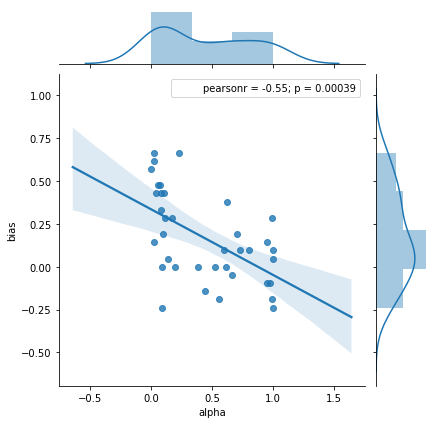

In [9]:
i = sns.jointplot(results['alpha'], all_induct_bias['overall'], kind='reg');
i = i.annotate(stats.pearsonr)
plt.xlabel('alpha')
plt.ylabel('bias')
plt.show()
#i.savefig('TesserScan_parse_overallbias.png', dpi = 300)

/Users/athula/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


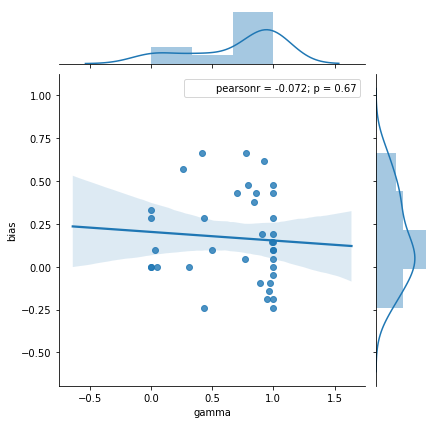

In [10]:
i = sns.jointplot(results['gamma'], all_induct_bias['overall'], kind='reg');
i = i.annotate(stats.pearsonr)
plt.xlabel('gamma')
plt.ylabel('bias')
plt.show()
#i.savefig('TesserScan_parse_overallbias.png', dpi = 300)

/Users/athula/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


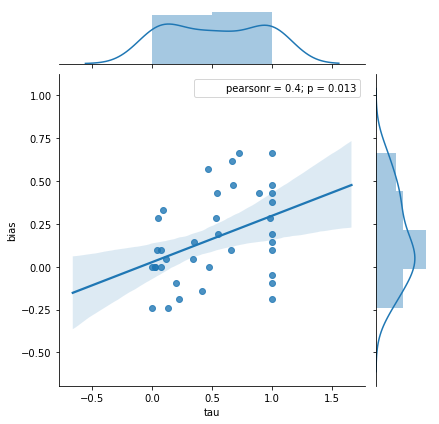

In [11]:
i = sns.jointplot(results['tau'], all_induct_bias['overall'], kind='reg');
i = i.annotate(stats.pearsonr)
plt.xlabel('tau')
plt.ylabel('bias')
plt.show()
#i.savefig('TesserScan_parse_overallbias.png', dpi = 300)

## Get response probabilities for the fitted models

In [12]:
res_list = []
for s in results.index.unique():
    subject = results.subject[s]
    subj_filter = f'SubjNum == {subject}'
    subj_struct = struct.query(subj_filter)
    subj_induct = induct.query(subj_filter)
    subj_param = results.loc[s]
    param = {'alpha': subj_param['alpha'], 'gamma': subj_param['gamma'],
             'tau': subj_param['tau']}
    res = fit.assess_induct_fit_subject(subj_struct, subj_induct, param)
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

/Users/athula/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/athula/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
pd.set_option('display.max_rows', None)
fitted

,SubjNum,TrialNum,QuestType,Environment,Source,Accuracy
0,100,1,Prim,ocean,Data,0.000000
1,100,2,Bound2,desert,Data,0.000000
2,100,3,Prim,desert,Data,1.000000
3,100,4,Prim,ocean,Data,1.000000
4,100,5,Prim,ocean,Data,0.000000
5,100,6,Prim,forest,Data,0.000000
6,100,7,Prim,desert,Data,0.000000
7,100,8,Prim,ocean,Data,1.000000
8,100,9,Prim,forest,Data,1.000000
9,100,10,Bound2,forest,Data,1.000000


In [14]:
#fitted.to_csv('individual_induct_StructSRmodel_trial_fits_alpha_free_gamma_free_gamma_tau_30.csv', index=False)
fitted.to_csv('individual_induct_StructSRmodel_trial_fits_alpha_free_gamma_free_gamma_free_tau.csv', index=False)

In [15]:
high_perf_fitted = fitted.loc[fitted['SubjNum'].isin(high_perf_subj)]

In [16]:
#high_perf_fitted.to_csv('individual_induct_StructSRmodel_trial_fits_alpha_free_gamma_free_gamma_tau_30_highperf.csv', index=False)
high_perf_fitted.to_csv('individual_induct_StructSRmodel_trial_fits_alpha_free_gamma_free_gamma_free_tau_highperf.csv', index=False)

# Plot individual differences in induction by environment

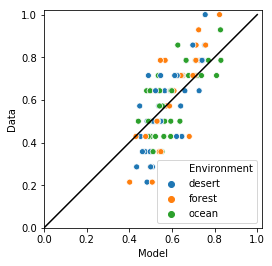

In [17]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

### high performers 

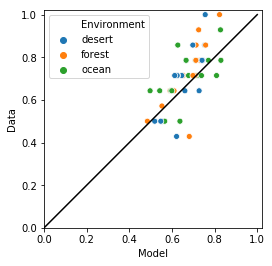

In [18]:
m = high_perf_fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

# Plot individual differences in induction by question type

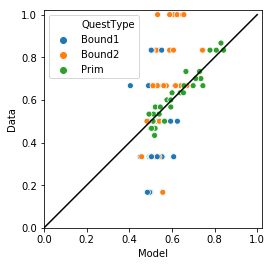

In [19]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');
plt.savefig('TesserScan_vs_StructSRModel_QuestTypeBias_Corr_fits_alpha_free_gamma_free_gamma_free_tau.png', dpi = 300)
plt.savefig('TesserScan_vs_StructSRModel_QuestTypeBias_Corr_fits_alpha_free_gamma_free_gamma_free_tau.pdf', transparent = True)

### high performers

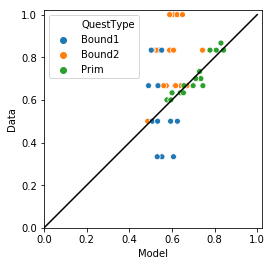

In [20]:
m = high_perf_fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Corr_fits_alpha_free_gamma_free_gamma_free_tau_highperf.png', dpi = 300)
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Corr_fits_alpha_free_gamma_free_gamma_free_tau_highperf.pdf', transparent = True)

# Plot group means by enviornment

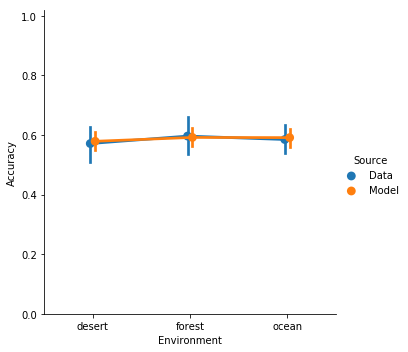

In [21]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='Environment', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));

In [22]:
### high performers 

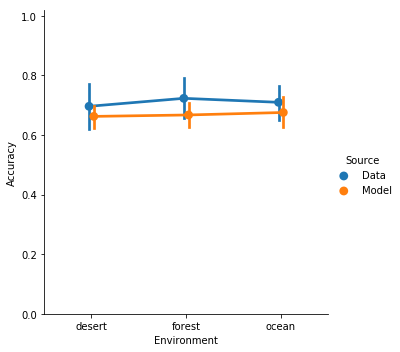

In [23]:
m = high_perf_fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='Environment', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));

# Plot group means by question type

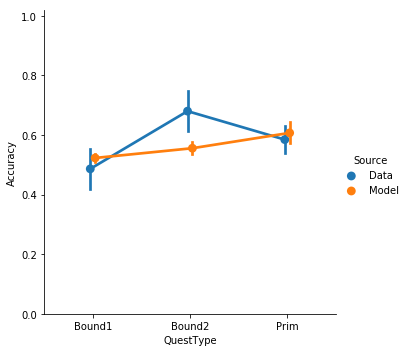

In [24]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='QuestType', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));
plt.savefig('TesserScan_vs_StructSRModel_QuestTypeBias_Mean_fits_alpha_free_gamma_free_gamma_free_tau.png', dpi = 300)
plt.savefig('TesserScan_vs_StructSRModel_QuestTypeBias_Mean_fits_alpha_free_gamma_free_gamma_free_tau.pdf', transparent = True)

### high performers

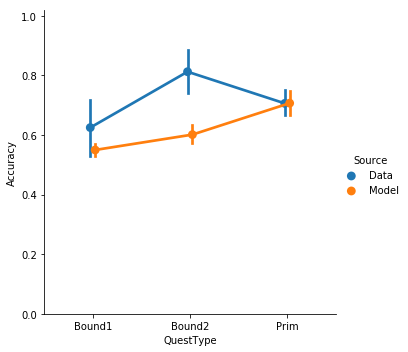

In [25]:
m = high_perf_fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='QuestType', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Mean_fits_alpha_free_gamma_free_gamma_free_tau_highperf.png', dpi = 300)
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Mean_fits_alpha_free_gamma_free_gamma_free_tau_highperf.pdf', transparent = True)